In [ ]:
# Load of libraries

In [5]:
import numpy as np
import pandas as pd

In [6]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,cross_val_score,GridSearchCV,cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [7]:
df = pd.read_csv('C:\Machine Learning\Cardiovascular Diseases\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.shape

(918, 12)

In [9]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
continuos_f = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
categorical_f = ["ChestPainType","RestingECG","ST_Slope"]
binaries_f = ["Sex","FastingBS","ExerciseAngina"]

In [12]:
df.isna().all()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [13]:
df[continuos_f].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [14]:
#  EDA and data wrangling

C:\Users\adars\AppData\Local\Temp\ipykernel_1084\2053250145.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

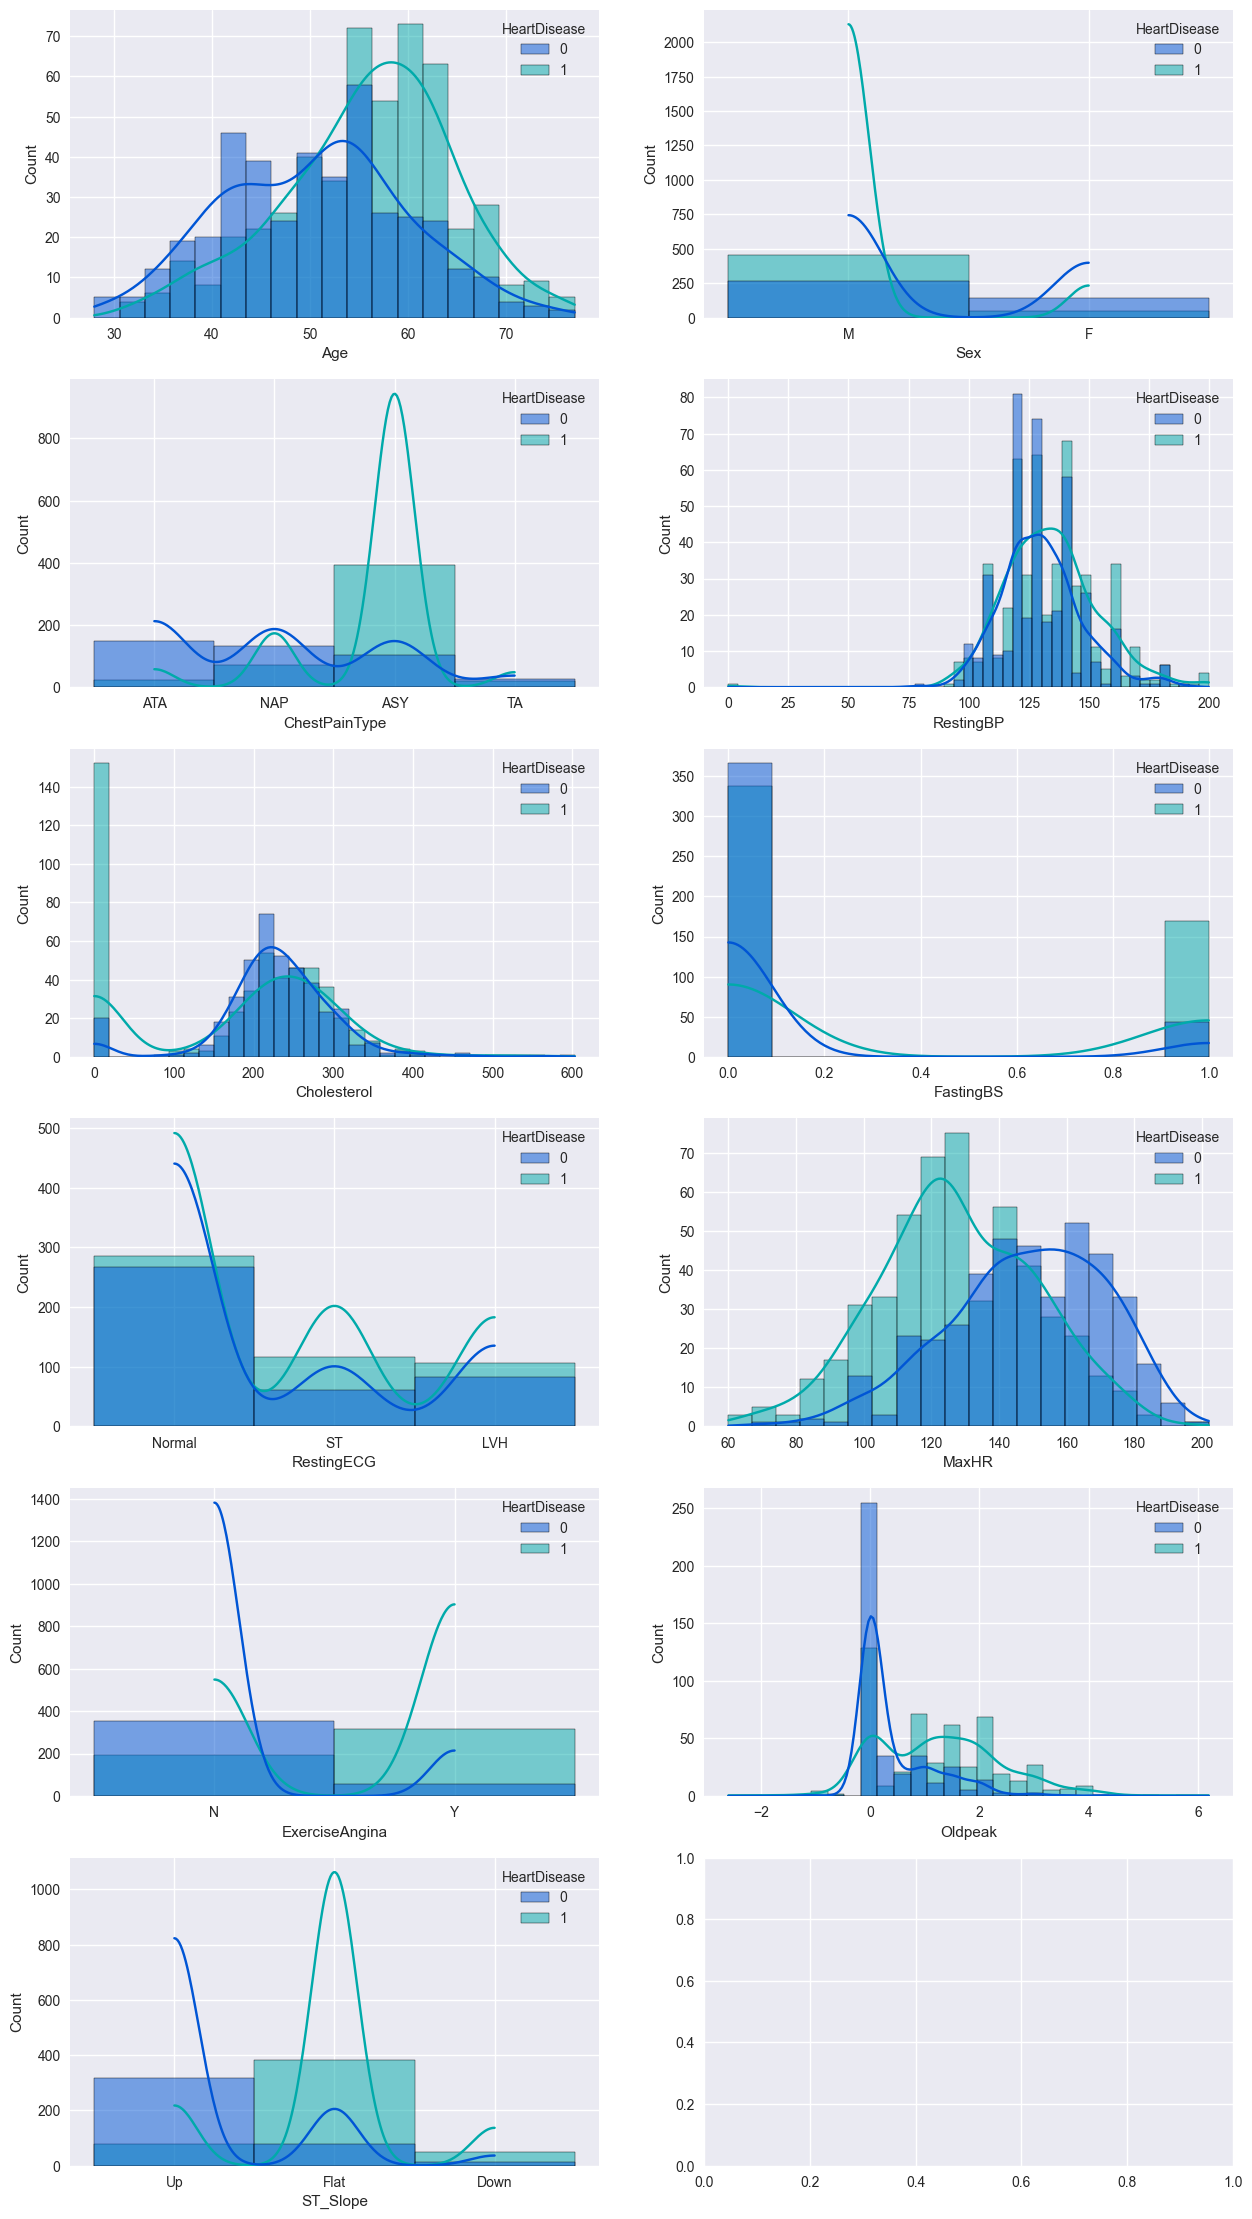

In [15]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'winter'

fig, axs = plt.subplots(6,2,figsize=(15,28))
i =1
for feature in df.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, kde=True,palette=color,hue='HeartDisease')
        i+=1

In [17]:
# Outlier Detection

In [18]:
def detect_outliers(label=None):
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((df[label] > Q1 - 1.5*IQR) & (df[label] < Q3 + 1.5*IQR))
    return df[interval], df[~interval]

def assign_mean(df_out, not_df_out, label=None):
    df.loc[df_out[df_out["HeartDisease"] == 0].index, label] = not_df_out[not_df_out["HeartDisease"] == 0][label].mean()
    df.loc[df_out[df_out["HeartDisease"] == 1].index, label] = not_df_out[not_df_out["HeartDisease"] == 1][label].mean()
    return

def delete_outliers(df_out):
    return df.drop(df_out.index)

<Axes: xlabel='Cholesterol'>

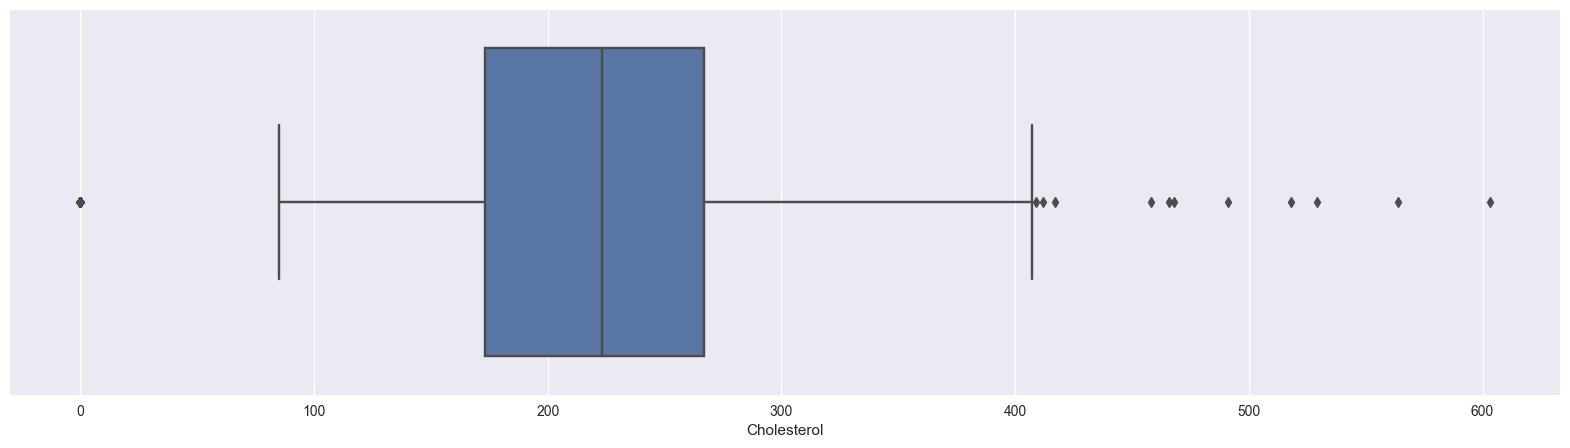

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="Cholesterol")

In [20]:
not_df_out_ch, df_out_ch = detect_outliers('Cholesterol')
print(f'Outliers in Cholesterol represent the {round((df_out_ch.shape[0]*100)/df.shape[0],2)}% of our dataset')
df_out_ch

Outliers in Cholesterol represent the 19.93% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


<Axes: xlabel='Cholesterol', ylabel='Count'>

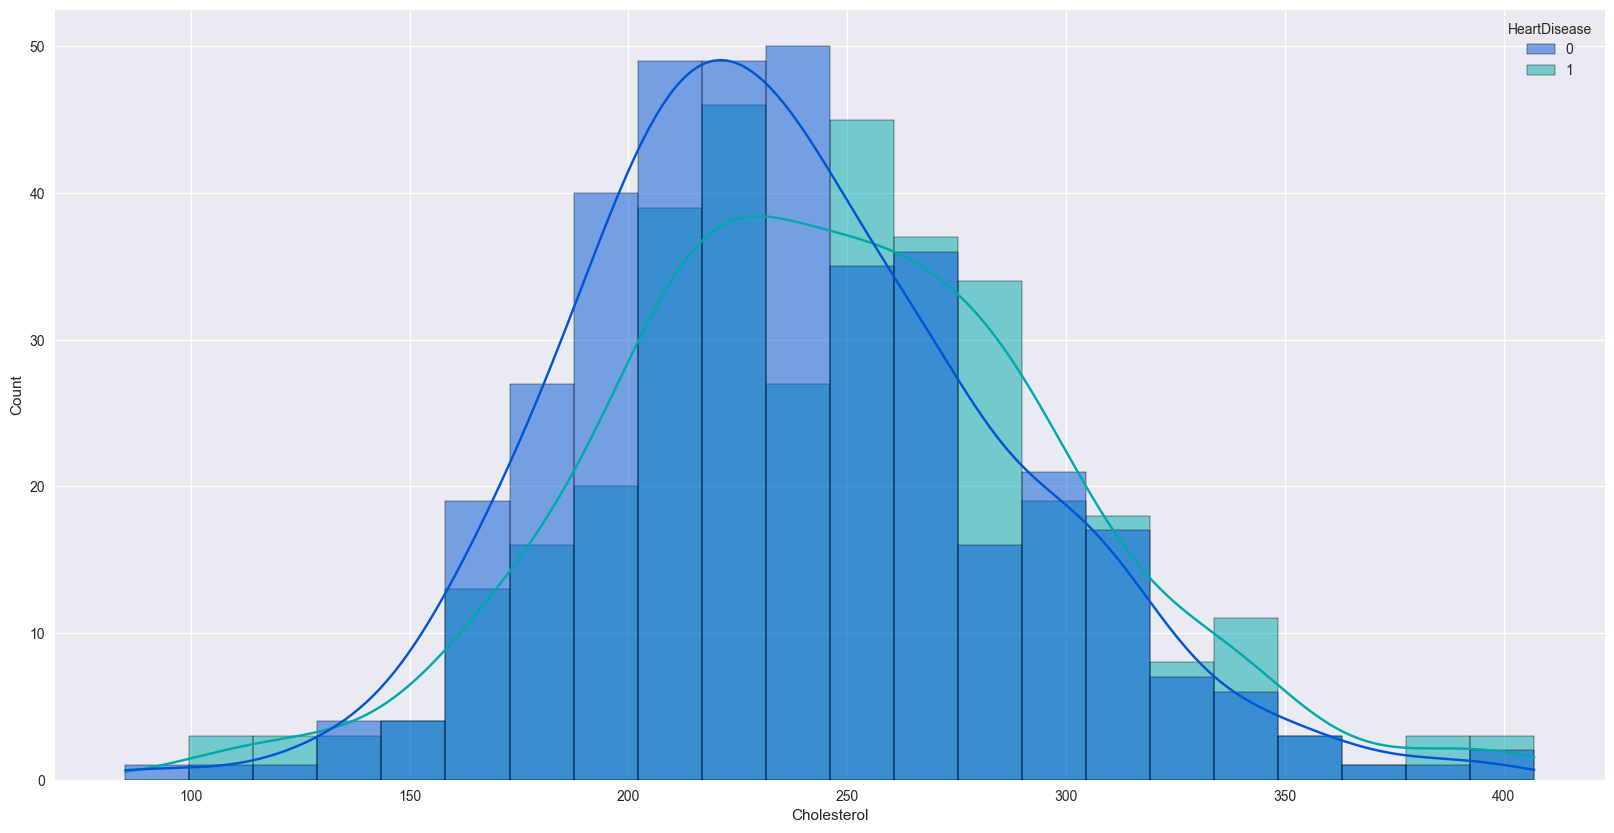

In [21]:
df = delete_outliers(df_out_ch[df_out_ch["Cholesterol"] == 0])
assign_mean(df_out_ch[df_out_ch["Cholesterol"] != 0], not_df_out_ch, 'Cholesterol')

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease')

<Axes: xlabel='RestingBP'>

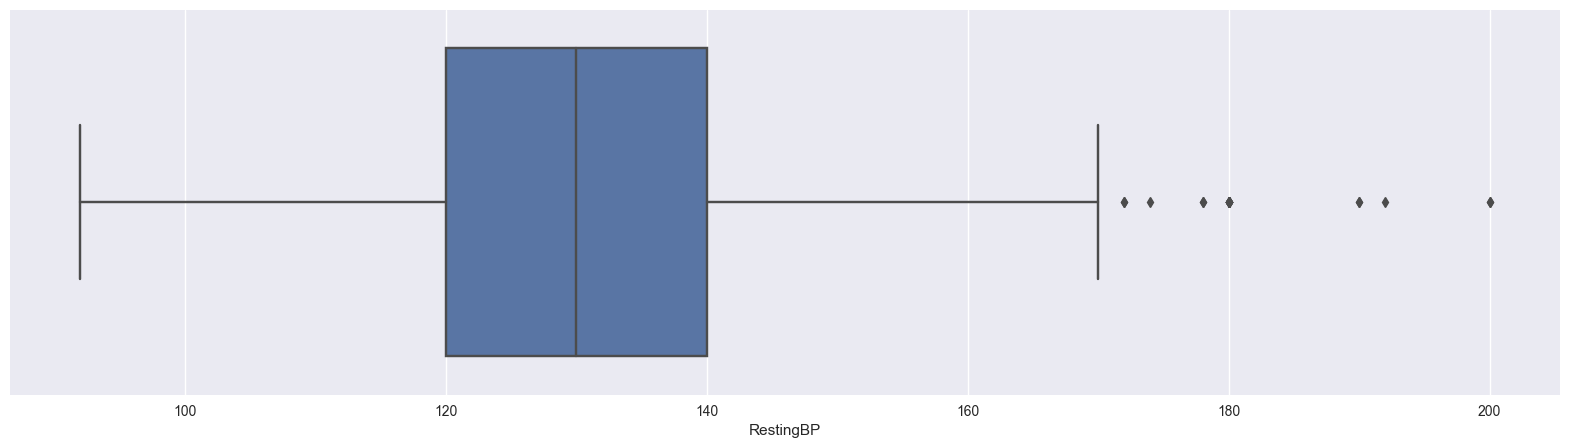

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='RestingBP')

In [23]:
not_df_out_rbp, df_out_rbp = detect_outliers('RestingBP')
print(f'Outliers in resting blood pressure represent the {round((df_out_rbp.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_rbp

Outliers in resting blood pressure represent the 4.29% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
86,65,M,ASY,170,263.0,1,Normal,112,Y,2.0,Flat,1
109,39,M,ATA,190,241.0,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393.0,0,Normal,110,Y,1.0,Flat,1
132,56,M,ASY,170,388.0,0,ST,122,Y,2.0,Flat,1
189,53,M,ASY,180,285.0,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280.0,0,ST,120,N,0.0,Up,0
191,50,M,ATA,170,209.0,0,ST,116,N,0.0,Up,0
215,30,F,TA,170,237.0,0,ST,170,N,0.0,Up,0
241,54,M,ASY,200,198.0,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295.0,0,Normal,180,N,0.0,Up,0


<Axes: xlabel='RestingBP', ylabel='Count'>

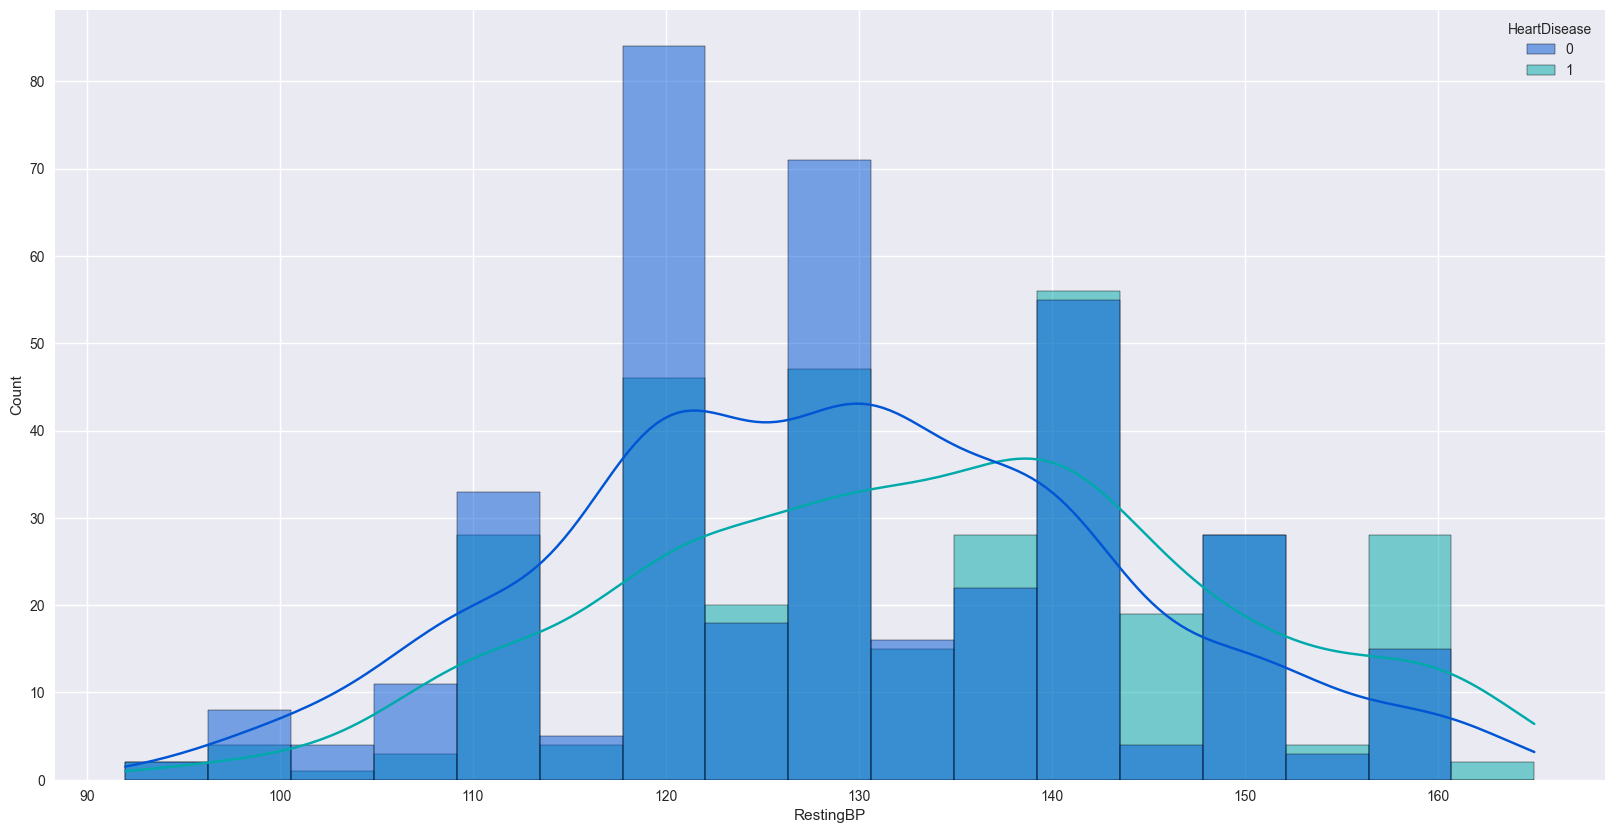

In [24]:
df = delete_outliers(df_out_rbp)
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')

In [25]:
px.scatter(data_frame=df, x="Age", y="MaxHR", color="HeartDisease")


In [26]:
px.scatter(data_frame=df, x="Oldpeak", y="MaxHR", color="HeartDisease")


In [27]:
px.scatter(data_frame=df,x="RestingBP",y="MaxHR",color="HeartDisease")

In [28]:
px.scatter(data_frame=df,x="Cholesterol",y="MaxHR",color="HeartDisease")

In [29]:
labels = ["Less Chance of Heart attack","More Chance of Heart attack"]
values = [df[df["HeartDisease"]==1].count().to_numpy()[0],df[df["HeartDisease"]==0].count().to_numpy()[0]]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,marker_colors=['cyan','darkblue'],textinfo='label+percent')])
fig.update(layout_title_text='Chance of Heart disease',layout_showlegend=False)
fig.show()

In [30]:
labels = ["Female With less chance of HA","Female With more chance of HA"]
values = [df[(df["Sex"]=='F') & (df["HeartDisease"]==0)].count().to_numpy()[0], df[(df["Sex"]=='F') & (df["HeartDisease"]==1)].count().to_numpy()[0]]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,marker_colors=['cyan','darkblue'],textinfo='label+percent')])
fig.update(layout_title_text='Probaility of Heart Disease per Women',layout_showlegend=False)
fig.show()

In [31]:
labels = ["Male With less chance of HA","Male With more chance of HA"]
values = [df[(df["Sex"]=='M') & (df["HeartDisease"]==0)].count().to_numpy()[0], df[(df["Sex"]=='M') & (df["HeartDisease"]==1)].count().to_numpy()[0]]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,marker_colors=['cyan','darkblue'],textinfo='label+percent')])
fig.update(layout_title_text='Probaility of Heart Disease per Men',layout_showlegend=False)
fig.show()

<Figure size 2000x4000 with 0 Axes>

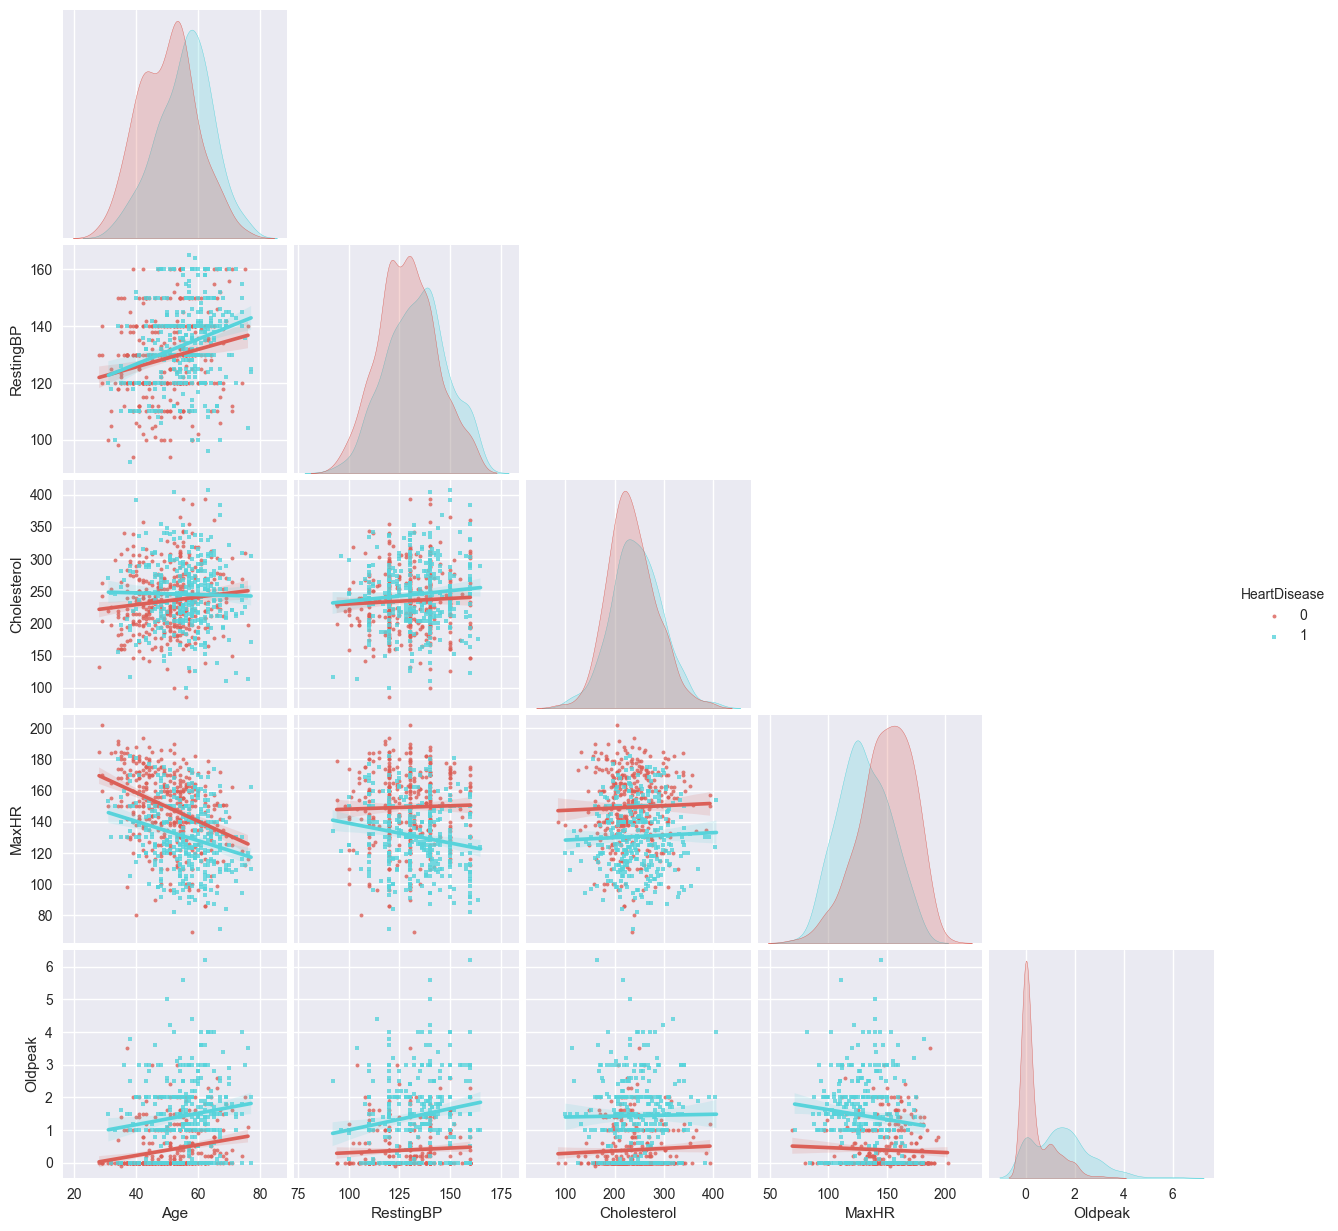

In [32]:
plt.figure(figsize=(20,40))
sns.pairplot(data=df[continuos_f+["HeartDisease"]],hue="HeartDisease",palette='hls',kind="reg",corner=True,markers=["o","s"],plot_kws={'scatter_kws':{'alpha':0.8,'s':8}})


In [ ]:
# Features encoding

In [ ]:
# Binary features enconding

In [33]:
df["Sex"]=df["Sex"].map({'M':1,'F':0})
df["ExerciseAngina"]=df["ExerciseAngina"].map({'N':0,'Y':1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193.0,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131.0,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236.0,0,LVH,174,0,0.0,Flat,1


In [ ]:
# Data Binning

In [34]:
df_bin = df.copy()
for feature in continuos_f:
    bins = 5
    df_bin[feature] = pd.cut(df[feature], bins=bins, labels=range(bins)).astype(np.int64)
df_bin

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,ATA,3,3,0,Normal,3,0,0,Up,0
1,2,0,NAP,4,1,0,Normal,3,0,0,Flat,1
2,0,1,ATA,2,3,0,ST,1,0,0,Up,0
3,2,0,ASY,3,2,0,Normal,1,1,1,Flat,1
4,2,1,NAP,3,1,0,Normal,1,0,0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,1,TA,1,2,0,Normal,2,0,1,Flat,1
914,4,1,ASY,3,1,1,Normal,2,0,2,Flat,1
915,2,1,ASY,2,0,0,Normal,1,1,1,Flat,1
916,2,0,ATA,2,2,0,LVH,3,0,0,Flat,1


In [ ]:
# One-hot encoding

In [35]:
df_dumm = pd.get_dummies(df_bin, columns = categorical_f+continuos_f)
df_dumm

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
914,1,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
915,1,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
916,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
# Correlations between features and label:

In [36]:
df_corr = df_dumm.corr()
df_corr["HeartDisease"].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Flat        0.595251
ExerciseAngina       0.548979
ChestPainType_ASY    0.523843
Sex                  0.306487
Oldpeak_1            0.297261
Oldpeak_2            0.261787
MaxHR_1              0.246226
Age_3                0.234047
FastingBS            0.148923
Oldpeak_3            0.126768
ST_Slope_Down        0.122051
RestingBP_4          0.110814
Cholesterol_3        0.108742
RestingBP_3          0.108064
MaxHR_0              0.102105
RestingECG_ST        0.099583
MaxHR_2              0.083049
Age_4                0.077150
Oldpeak_4            0.069091
RestingECG_LVH       0.063949
Cholesterol_0        0.010481
Cholesterol_4        0.009348
Cholesterol_2       -0.007519
RestingBP_2         -0.030745
Age_2               -0.037033
ChestPainType_TA    -0.042540
RestingBP_0         -0.074276
Cholesterol_1       -0.093403
RestingBP_1         -0.115718
RestingECG_Normal   -0.130259
Age_0               -0.135895
Age_1               -0.166444
MaxHR_4   

In [ ]:
# Division into training and test sets

In [37]:
df_clean = df_dumm.copy()
X = df_clean.drop(["HeartDisease"],axis=1)
y = df_clean["HeartDisease"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 42,stratify=y)
X_train

,Sex,FastingBS,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
222,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
680,1,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
114,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
637,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
792,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
100,1,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
94,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
26,1,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [38]:
X_test

,Sex,FastingBS,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
13,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
771,1,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
220,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
795,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
537,1,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
473,1,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
693,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
77,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
#  Modeling

In [39]:
metric = 'recall'

In [40]:
cv = 15
nFeatures = len(X_train.columns)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("Fasle Positive Rate")
    plt.ylabel("True positive rate")

def print_scores(y,y_pred):
    ac,pr,rc,f1 = accuracy_score(y,y_pred)*100,precision_score(y,y_pred)*100,recall_score(y,y_pred)*100,f1_score(y,y_pred,average='weighted')*100
    print(f"Accuracy: {ac}")
    print(f"precision: {pr}")
    print(f"recall: {rc}")
    print(f"f1-score: {f1}")
    return{'ac': ac,'pr': pr,'rc': rc,'f1': f1}


In [41]:
#  K-Nearest Neighbors Classifier --STARTS

In [42]:
param_grid = [{
    'n_neighbors':np.arange(5,21),
    'weights':['uniform','distance'],
    'p':[1,2]
}]
knn_clf = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_clf, param_grid,cv=cv,scoring=metric)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='recall')

In [43]:
best_knn_clf = grid_knn.best_estimator_
grid_knn.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

<Axes: >

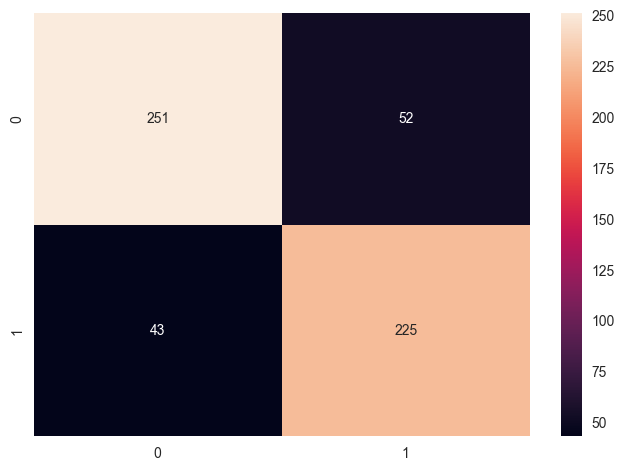

In [44]:
y_train_pred = cross_val_predict(best_knn_clf, X_train, y_train,cv = cv)
conf_mx = confusion_matrix(y_train,y_train_pred)
sns.heatmap(conf_mx,annot=True,fmt='')

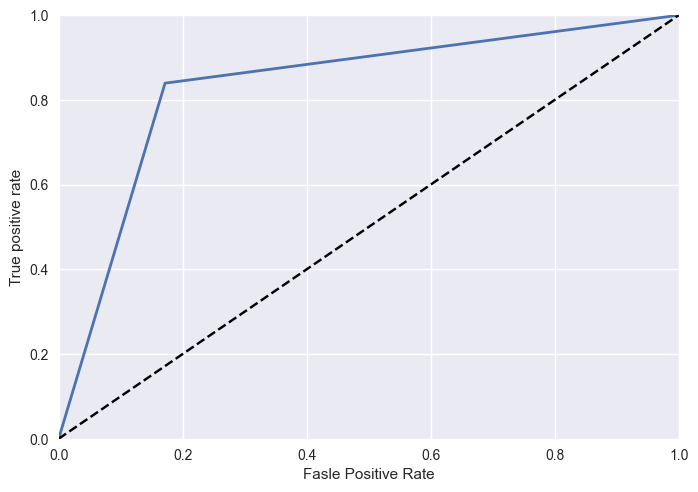

In [45]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()

In [46]:
roc_auc_score(y_train, y_train_pred)

0.8339675385448992

<Axes: >

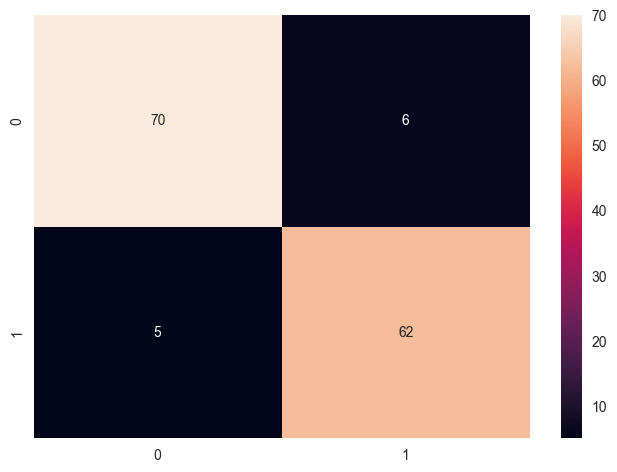

In [47]:
y_test_pred = cross_val_predict(best_knn_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

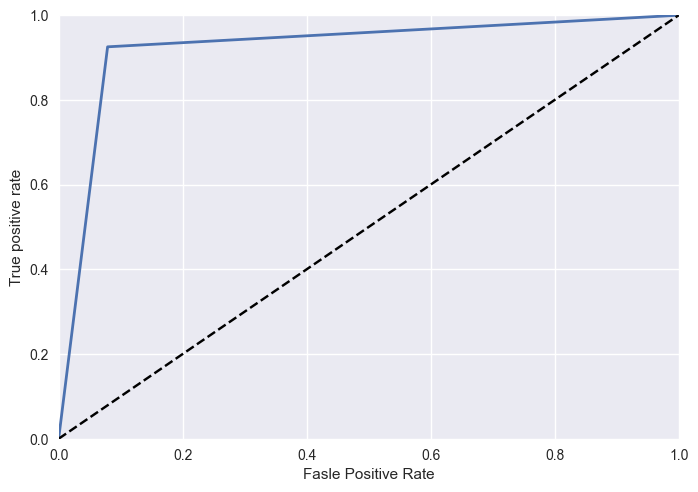

In [48]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()

In [49]:
roc_auc_score(y_test, y_test_pred)

0.9232128829536528

In [50]:
knn_scores = print_scores(y_test, y_test_pred)

Accuracy: 92.3076923076923
precision: 91.17647058823529
recall: 92.53731343283582
f1-score: 92.31071111865813


In [51]:
# ENDS 

In [52]:
# C-support Vector classifier -- Starts

In [53]:
param_grid = [{
    "C":np.linspace(1,1.5,10),
    "kernel":['linear','poly','rbf','sigmoid'],
    "gamma":['scale','auto']    
}]
svc_clf = SVC()
grid_svc = GridSearchCV(svc_clf,param_grid,scoring=metric,cv=cv)
grid_svc.fit(X_train,y_train)


GridSearchCV(cv=15, estimator=SVC(),
             param_grid=[{'C': array([1.        , 1.05555556, 1.11111111, 1.16666667, 1.22222222,
       1.27777778, 1.33333333, 1.38888889, 1.44444444, 1.5       ]),
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='recall')

In [54]:
best_svc_clf =grid_svc.best_estimator_
grid_svc.best_params_


{'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

<Axes: >

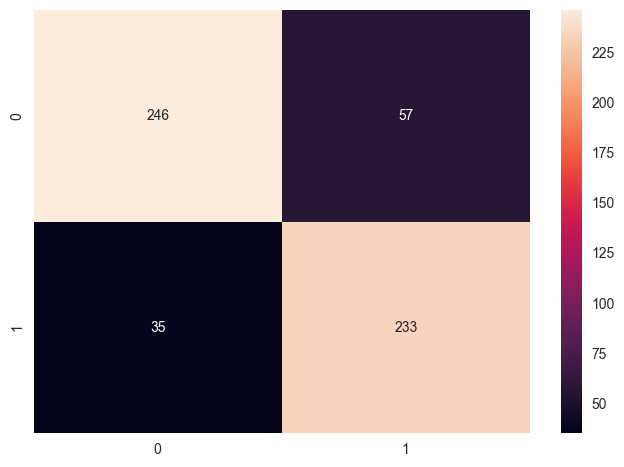

In [55]:
y_train_pred = cross_val_predict(best_svc_clf,X_train,y_train,cv=cv)
conf_mx  = confusion_matrix(y_train,y_train_pred)
sns.heatmap(conf_mx,annot=True,fmt = '')


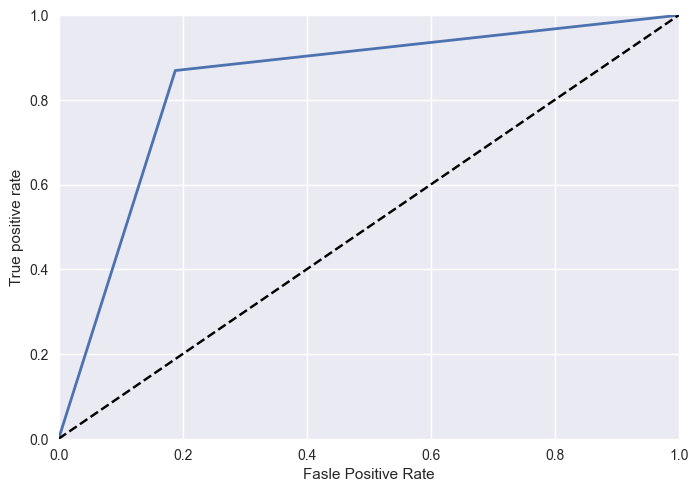

In [56]:
fpr_svc,tpr_svc,thresshold_svc = roc_curve(y_train,y_train_pred)
plot_roc_curve(fpr_svc,tpr_svc,"SVC")
plt.show()

In [57]:
roc_auc_score(y_train,y_train_pred)

0.8406420865967195

<Axes: >

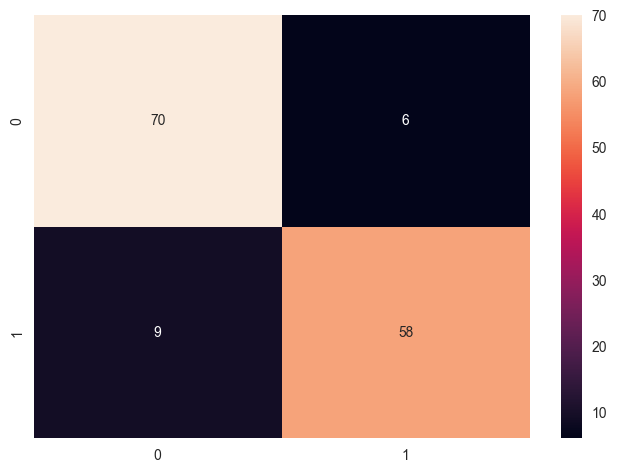

In [58]:
y_test_pred = cross_val_predict(best_svc_clf,X_test,y_test,cv =cv)
conf_mx = confusion_matrix(y_test,y_test_pred)
sns.heatmap(conf_mx,annot=True,fmt='')

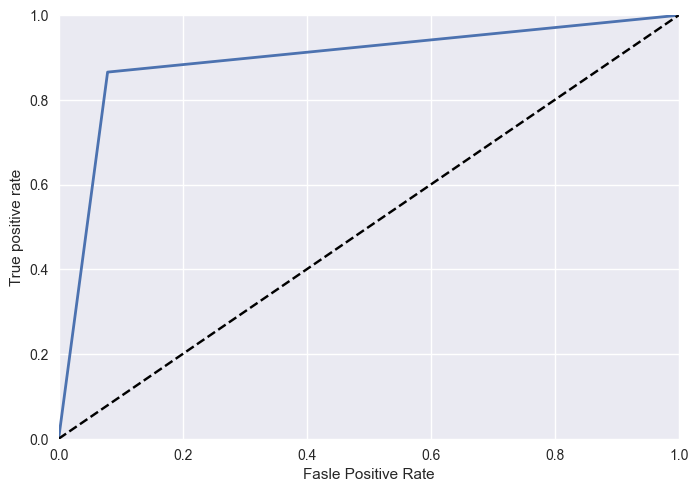

In [59]:
fpr_svc,tpr_svc,thresshold_svc = roc_curve(y_test,y_test_pred)
plot_roc_curve(fpr_svc,tpr_svc,"SVC")
plt.show()

In [60]:
roc_auc_score(y_test,y_test_pred)


0.893362136684996

In [61]:
svc_scores = print_scores(y_test,y_test_pred)

Accuracy: 89.5104895104895
precision: 90.625
recall: 86.56716417910447
f1-score: 89.49189200358863


In [62]:
# Random Forest Classifer

In [63]:
nFeatures

38

In [64]:
param_grid = [{"n_estimators":[650, 700, 750, 800],
               'criterion':['gini','entropy'],
               "max_features":[nFeatures-9, nFeatures-8, nFeatures-5]
              }]
rf_clf = RandomForestClassifier(random_state=42)
grid_forest = GridSearchCV(rf_clf, param_grid, cv=cv, scoring=metric)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': [29, 30, 33],
                          'n_estimators': [650, 700, 750, 800]}],
             scoring='recall')

In [65]:
best_rf_clf = grid_forest.best_estimator_
best_rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 700,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

<Axes: >

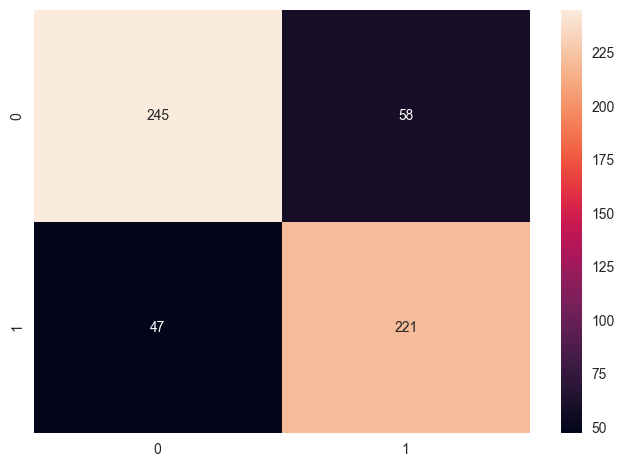

In [66]:
y_train_pred = cross_val_predict(best_rf_clf, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

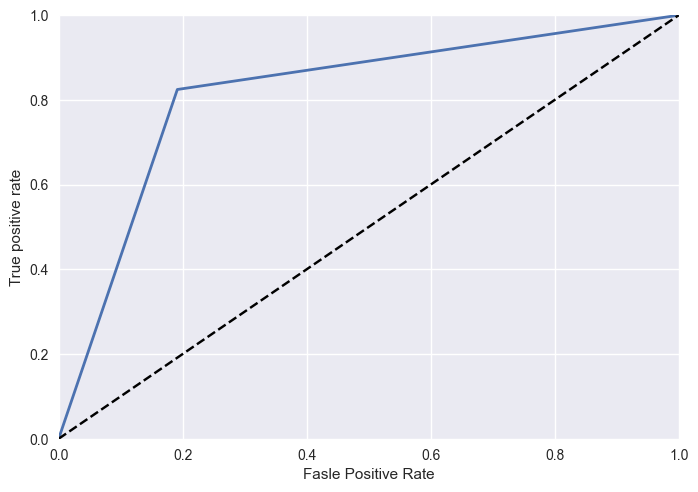

In [67]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

<Axes: >

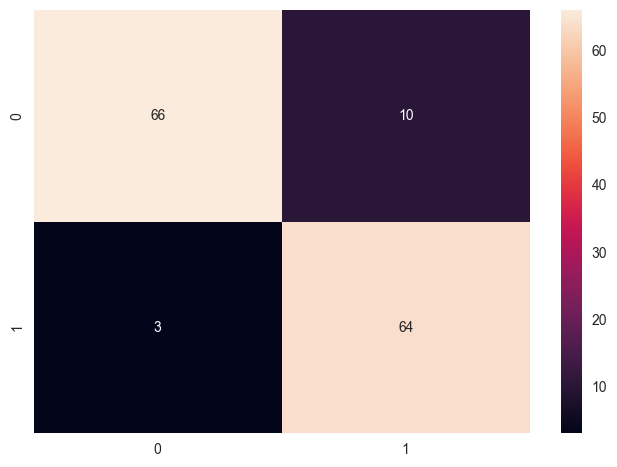

In [68]:
y_test_pred = cross_val_predict(best_rf_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

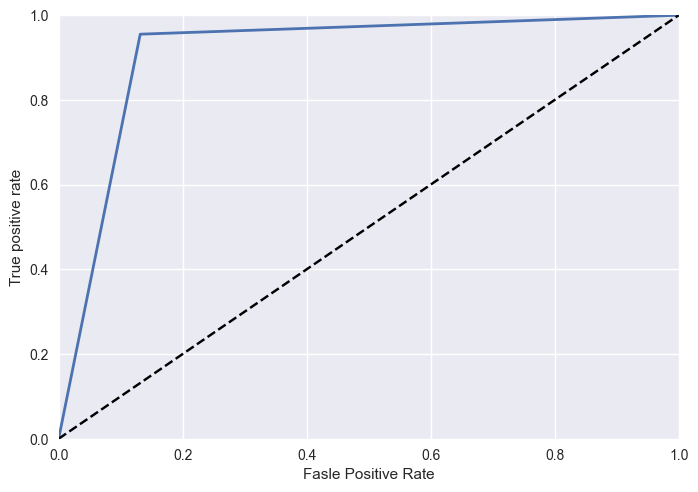

In [69]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [70]:
roc_auc_score(y_test, y_test_pred)

0.9118224666142971

In [71]:
rf_scores = print_scores(y_test, y_test_pred)

Accuracy: 90.9090909090909
precision: 86.48648648648648
recall: 95.52238805970148
f1-score: 90.9153160363725


In [ ]:
# Model Score Comparisons

In [72]:
scores = pd.DataFrame(data=[list(knn_scores.values()), list(svc_scores.values()), list(rf_scores.values())], columns=list(knn_scores.keys()))
scores = scores.transpose()
scores = scores.rename(columns={0:"K-Nearest Neighbors", 1:"C-Support Vector", 2:"Random Forest"})
scores.style.highlight_max(color = 'green', axis = 1)

,K-Nearest Neighbors,C-Support Vector,Random Forest
ac,92.307692,89.510490,90.909091
pr,91.176471,90.625000,86.486486
rc,92.537313,86.567164,95.522388
f1,92.310711,89.491892,90.915316
